In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print('Importing Libraries')

import pandas as pd
import numpy as np
import pickle as pkl
from textblob import TextBlob
from nltk.corpus import stopwords
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LSTM
from keras.layers import Embedding
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import string
import re
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

print('downloading stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
print('Libraries Imported')

Importing Libraries
downloading stopwords
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Libraries Imported


In [ ]:
print('initializing necessary functions')
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
print('necessary functions initialized')

initializing necessary functions
necessary functions initialized


In [ ]:
valid_str = string.ascii_letters+' '+'0123456789.'
printable = string.printable
stopwords_list = stopwords.words('english')
stopwords_list.extend('br')
whitelist = ["n't", "not", "no"]

def preprocess_text(text):
    global valid_str, printable, stopwords_list, whitelist
    text = re.sub('[\s\n]+', ' ', text.lower())
    text = ''.join([t for t in text if t in valid_str and t in printable])
    # "Removing stop words from the sentences"
    text = " ".join([word for word in text.split() if (word not in stopwords_list or word in whitelist) and len(word) > 1])
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [ ]:
all_text = ''
with open(r'/content/drive/My Drive/datasets/next_word_prediction/bookdataset.txt', 'r', encoding='utf-8') as f:
    all_text = f.read()
print(all_text[:100])

Mowgli’s Brothers

     Now Rann the Kite brings home the night
        That Mang the Bat sets free-


In [ ]:
clean_text = [preprocess_text(text) for text in all_text.split('.')]
print(len(clean_text))

13128


In [ ]:
word_list = list(set(' '.join(clean_text).split()))
print(len(word_list))
word_list = [word for word in word_list if len(word) > 1]
print(len(word_list))
# sequence_data = tokenizer.texts_to_sequences([word_list])[0]

15986
15984


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([word_list])
vocab_size = len(word_list) + 1


In [ ]:
# saving the tokenizer for predict function.
pkl.dump(tokenizer, open('/content/drive/My Drive/datasets/next_word_prediction/tokenizer.pkl', 'wb'))

In [ ]:
encoded_list = []
for text in clean_text:
    text_encode = tokenizer.texts_to_sequences([text.split()])[0]
    text_split = text.split()
#     print(text_split, text_encode)
    for i in range(1, len(text_encode)):
        encoded_list.append(text_encode[i-1:i+1])

In [ ]:
len(encoded_list)

137673

In [ ]:
X = []
y = []
for txt_en in encoded_list:
    X.append(txt_en[0])
    y.append(txt_en[1])
    
X = np.array(X)
y = np.array(y)

y = to_categorical(y, num_classes=vocab_size)

https://towardsdatascience.com/next-word-prediction-with-nlp-and-deep-learning-48b9fe0a17bf

In [ ]:
from keras.models import Sequential

model = Sequential()

model.add(Embedding(vocab_size, 10, input_length=1))

model.add(LSTM(1000)) #, return_sequences=True))

# model.add(LSTM(100))

model.add(Dense(1000, activation='relu'))

model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
callbacks=[
    ModelCheckpoint("/content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto'),
    ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=0.005, verbose = 1)
#     TensorBoard(log_dir='lognextword1')
]

In [ ]:
model.compile(loss = "categorical_crossentropy",
            #   optimizer = Adam(lr=0.01),
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             159850    
_________________________________________________________________
lstm (LSTM)                  (None, 1000)              4044000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 15985)             16000985  
Total params: 21,205,835
Trainable params: 21,205,835
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, 
                    epochs=250,
#                     batch_size=64,
                    callbacks=callbacks,
                    verbose=2).history

Epoch 1/250

Epoch 00001: loss improved from inf to 8.33772, saving model to /content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5
4303/4303 - 51s - loss: 8.3377 - accuracy: 0.0145
Epoch 2/250

Epoch 00002: loss improved from 8.33772 to 8.04397, saving model to /content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5
4303/4303 - 51s - loss: 8.0440 - accuracy: 0.0218
Epoch 3/250

Epoch 00003: loss improved from 8.04397 to 7.77407, saving model to /content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5
4303/4303 - 53s - loss: 7.7741 - accuracy: 0.0279
Epoch 4/250

Epoch 00004: loss improved from 7.77407 to 7.45138, saving model to /content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5
4303/4303 - 52s - loss: 7.4514 - accuracy: 0.0354
Epoch 5/250

Epoch 00005: loss improved from 7.45138 to 7.12128, saving model to /content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5
4303/4303 - 53s - loss: 7.1213 - accuracy: 0.0441

dict_keys(['loss', 'accuracy', 'lr'])


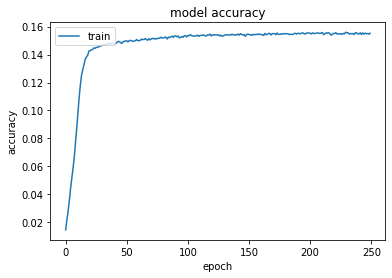

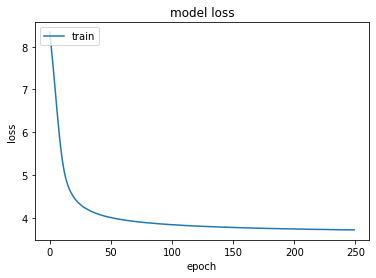

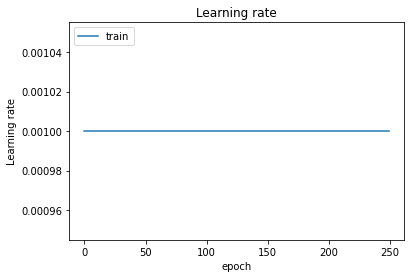

In [ ]:
print(history.keys())
#  "Accuracy"
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Learning rate
# "Loss"
plt.plot(history['lr'])
plt.title('Learning rate')
plt.ylabel('Learning rate')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Predicting the next word

from keras.models import load_model
import pickle as pkl
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

print('downloading stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
print('Libraries Imported')


print('initializing necessary functions')
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
valid_str = string.ascii_letters+' '+'0123456789.'
printable = string.printable
stopwords_list = stopwords.words('english')
stopwords_list.extend('br')
whitelist = ["n't", "not", "no"]

algo_tokenizer = pkl.load(open('/content/drive/My Drive/datasets/next_word_prediction/tokenizer.pkl', 'rb'))
algo_model = load_model(r'/content/drive/My Drive/datasets/next_word_prediction/nextword_new.h5')
print('necessary functions initialized')


downloading stopwords
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Libraries Imported
initializing necessary functions
necessary functions initialized


In [ ]:

def preprocess_text(text):
    global valid_str, printable, stopwords_list, whitelist
    text = re.sub('[\s\n]+', ' ', text.lower())
    text = ''.join([t for t in text if t in valid_str and t in printable])
    # "Removing stop words from the sentences"
    text = " ".join([word for word in text.split() if (word not in stopwords_list or word in whitelist) and len(word) > 1])
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def predict_next(text):
    # print('next word prediction for :', text)
    text = preprocess_text(text)
    token = text.split()
    if len(token) > 0:
        token = algo_tokenizer.texts_to_sequences([token[-1]])
        predictions = algo_model.predict_classes(token)
        predictions = [word for word, index, in algo_tokenizer.word_index.items() if index in predictions]
        # print('next predicted word for given sentence :', '\n'.join(predictions))
        return predictions

    return 'Invalid Input'

In [ ]:
text = 'In the dark'
print('predicted text:', predict_next(text))

predicted text: ['night']


In [ ]:
text = 'I was Struggling very hard'
print('I was Struggling very:', predict_next('I was Struggling very'))
print('I was Struggling:',predict_next('I was Struggling'))
print('I was:',predict_next('I was'))

I was Struggling very: ['mass']
I was Struggling: ['mass']
I was: Invalid Input


In [ ]:
print('I am in love with:', predict_next('I am in love with'))

I am in love with: ['must']


**The outputs are actually funny**